In [17]:
from textblob.classifiers import NaiveBayesClassifier
import pandas
import re
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords 
from textblob import TextBlob
from textblob import classifiers
from textblob.sentiments import NaiveBayesAnalyzer
from nltk.corpus import stopwords #import stopwords
from nltk.tokenize import RegexpTokenizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory #import Indonesian Stemmer
import re #import regular expression
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
df = pandas.read_csv('weather-agg-DFE.csv', usecols =["tweet_text","what_emotion_does_the_author_express_specifically_about_the_weather"])
text = df["tweet_text"].tolist()
sentiment = df["what_emotion_does_the_author_express_specifically_about_the_weather"].tolist()

test = pandas.read_csv('weather-evaluated-agg-DFE.csv', usecols =["tweet_text","sentiment"])
text_test = test["tweet_text"].tolist()
sentiment_test = test["sentiment"].tolist()

text_prepro = []
stopw = [] #arrayuntukstopword
train = []

i = 0
j = 0
k = 0

In [3]:
def preprocessing(data):        
    sentence = ' '.join(re.sub('@[^\s]+','',data).split())   #removeMention
    sentence = ' '.join(re.sub(r"http\S+", '', sentence).split())  #removeLink
    sentence = ' '.join(re.sub('#\S+', '', sentence).split())  #removeHashtag
    sentence = ' '.join(re.sub('RT', '', sentence).split())  #removeRT
    sentence = ' '.join(re.sub('[^a-zA-Z]', " ", sentence).split()) #removeSymbol
    sentence = ' '.join(re.sub('(\\b[A-Za-z] \\b|\\b [A-Za-z]\\b)', '', sentence).split()) #removeOneChar
    sentence = ' '.join(re.sub("\s\s+" , " ", sentence).split()) #removeMultiSpace
    sentence = sentence.lower().split()
    return sentence

def stopword(str):
    stop_words = set(stopwords.words('english')) 
    word_tokens = word_tokenize(str) 
    filtered_sentence = [w for w in word_tokens if not w in stop_words]  
    filtered_sentence = [] 
    
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w)
    return filtered_sentence

In [4]:
#training
while i < len(text):
    result = ' '.join(preprocessing(text[i]))
    text_prepro.append(result)  #menambahkan objek baru ke dalam list
    i += 1
    
while j < len(text):
    baru = ' '.join(stopword(text_prepro[j]))
    stopw.append(baru)
    j += 1

while k < len(df):
    data_train = (stopw[k], sentiment[k])
    train.append(data_train)
    k += 1

In [7]:
print(train)

[('grilling kabobs grill last night amazing glad weather finally', 'Positive'), ('slowest day ever weather makes even worse', 'Negative'), ('fire weather watch issued may pm cdt expiring may pm cdt nws lubbock link', 'Neutral / author is just sharing information'), ('im going lunch early today weather nice outside im going enjoy somewhere pleasant', 'Positive'), ('weekend weather causes delays bridge work link', 'Neutral / author is just sharing information'), ('passing working tonight storms today would nice would great sleeping weather mmmm', 'Positive'), ('us gas warm weather forecasts lift natural gas futures link', 'Neutral / author is just sharing information'), ('friday tha stadium tha weather bad gone tha gym', 'Negative'), ('hate weather good day movie marathon though xmen', 'Negative'), ('tgif biatches sunny friday regardless rain drama', 'Positive'), ('good crowd wrigley today terrible weather tell redneck called check reds crowd wed day game', 'Negative'), ('storm authentic

In [8]:
cl = NaiveBayesClassifier(train)

In [ ]:
# blob = TextBlob("My husband love fishing. "
#                 "But the weather was bad. He was not happy.",
#                 classifier=cl)
# for sentence in blob.sentences:
#     print(str(sentence)+" : "+str(sentence.classify()))

In [15]:
#testing
countacc = 0
test_prep = []
test_stopw = []

i = 0
j = 0
k = 0

while i < len(test):
    baru = ' '.join(preprocessing(text_test[i]))
    test_prep.append(baru)
    i += 1
    
while j < len(test):
    baru = ' '.join(stopword(test_prep[j]))
    test_stopw.append(baru)
    j += 1

while k < len(test):
    blob = TextBlob(test_stopw[k], classifier=cl)
    print("Actual : "+blob.classify() + "       Prediction : " + sentiment_test[k])
    if(blob.classify() == sentiment_test[k]) :
        countacc = countacc + 1
    k += 1

Actual : Positive       Prediction : Positive
Actual : Negative       Prediction : Negative
Actual : Neutral / author is just sharing information       Prediction : Neutral / author is just sharing information
Actual : Positive       Prediction : Positive
Actual : Neutral / author is just sharing information       Prediction : Neutral / author is just sharing information
Actual : Positive       Prediction : Positive
Actual : Neutral / author is just sharing information       Prediction : Neutral / author is just sharing information
Actual : Negative       Prediction : Negative
Actual : Negative       Prediction : Negative
Actual : Positive       Prediction : Positive
Actual : Negative       Prediction : Negative
Actual : Tweet not related to weather condition       Prediction : Tweet not related to weather condition
Actual : Negative       Prediction : Negative
Actual : Neutral / author is just sharing information       Prediction : Neutral / author is just sharing information
Actual :

Actual : Positive       Prediction : Positive
Actual : Neutral / author is just sharing information       Prediction : Neutral / author is just sharing information
Actual : Negative       Prediction : Negative
Actual : Positive       Prediction : Positive
Actual : Negative       Prediction : I can't tell
Actual : Positive       Prediction : Negative
Actual : Tweet not related to weather condition       Prediction : Tweet not related to weather condition
Actual : Tweet not related to weather condition       Prediction : Tweet not related to weather condition
Actual : Negative       Prediction : Negative
Actual : Negative       Prediction : Negative
Actual : Tweet not related to weather condition       Prediction : Tweet not related to weather condition
Actual : Negative       Prediction : Negative
Actual : Negative       Prediction : Negative
Actual : Positive       Prediction : Positive
Actual : Positive       Prediction : Positive
Actual : Neutral / author is just sharing information 

Actual : Negative       Prediction : Negative
Actual : Neutral / author is just sharing information       Prediction : Neutral / author is just sharing information
Actual : Neutral / author is just sharing information       Prediction : Neutral / author is just sharing information
Actual : Neutral / author is just sharing information       Prediction : Neutral / author is just sharing information
Actual : Negative       Prediction : Negative
Actual : Negative       Prediction : Negative
Actual : Positive       Prediction : Positive
Actual : Negative       Prediction : Negative
Actual : Neutral / author is just sharing information       Prediction : Neutral / author is just sharing information
Actual : Positive       Prediction : Positive
Actual : Positive       Prediction : Positive
Actual : Tweet not related to weather condition       Prediction : Tweet not related to weather condition
Actual : Negative       Prediction : Negative
Actual : Positive       Prediction : Neutral / author 

Actual : Positive       Prediction : Positive
Actual : Neutral / author is just sharing information       Prediction : Neutral / author is just sharing information
Actual : Tweet not related to weather condition       Prediction : Tweet not related to weather condition
Actual : Neutral / author is just sharing information       Prediction : Neutral / author is just sharing information
Actual : Positive       Prediction : Positive
Actual : Neutral / author is just sharing information       Prediction : Neutral / author is just sharing information
Actual : Neutral / author is just sharing information       Prediction : Neutral / author is just sharing information
Actual : Negative       Prediction : Negative
Actual : Tweet not related to weather condition       Prediction : Tweet not related to weather condition
Actual : Neutral / author is just sharing information       Prediction : Neutral / author is just sharing information
Actual : Neutral / author is just sharing information       

Actual : Positive       Prediction : Positive
Actual : Negative       Prediction : Negative
Actual : Positive       Prediction : Positive
Actual : Tweet not related to weather condition       Prediction : Tweet not related to weather condition
Actual : Negative       Prediction : Neutral / author is just sharing information
Actual : Negative       Prediction : Negative
Actual : Tweet not related to weather condition       Prediction : Tweet not related to weather condition
Actual : Tweet not related to weather condition       Prediction : Tweet not related to weather condition
Actual : Tweet not related to weather condition       Prediction : Tweet not related to weather condition
Actual : Neutral / author is just sharing information       Prediction : Neutral / author is just sharing information
Actual : Tweet not related to weather condition       Prediction : Tweet not related to weather condition
Actual : Tweet not related to weather condition       Prediction : Tweet not related t

Actual : Neutral / author is just sharing information       Prediction : Neutral / author is just sharing information
Actual : Tweet not related to weather condition       Prediction : Tweet not related to weather condition
Actual : Tweet not related to weather condition       Prediction : Tweet not related to weather condition
Actual : Negative       Prediction : Negative
Actual : Tweet not related to weather condition       Prediction : Tweet not related to weather condition
Actual : Negative       Prediction : Negative
Actual : Tweet not related to weather condition       Prediction : Tweet not related to weather condition
Actual : Neutral / author is just sharing information       Prediction : Neutral / author is just sharing information
Actual : Negative       Prediction : Negative
Actual : Tweet not related to weather condition       Prediction : Neutral / author is just sharing information
Actual : Negative       Prediction : Negative
Actual : Tweet not related to weather condit

Actual : Tweet not related to weather condition       Prediction : Tweet not related to weather condition
Actual : Negative       Prediction : Negative
Actual : Neutral / author is just sharing information       Prediction : Neutral / author is just sharing information
Actual : Negative       Prediction : Neutral / author is just sharing information
Actual : Neutral / author is just sharing information       Prediction : Neutral / author is just sharing information
Actual : Negative       Prediction : Negative
Actual : Negative       Prediction : Negative
Actual : Negative       Prediction : Negative
Actual : Negative       Prediction : Negative
Actual : Negative       Prediction : Negative
Actual : Neutral / author is just sharing information       Prediction : Neutral / author is just sharing information
Actual : Neutral / author is just sharing information       Prediction : Neutral / author is just sharing information
Actual : Positive       Prediction : Positive
Actual : Tweet not

Actual : Neutral / author is just sharing information       Prediction : Neutral / author is just sharing information
Actual : Negative       Prediction : Negative
Actual : Tweet not related to weather condition       Prediction : Tweet not related to weather condition
Actual : Tweet not related to weather condition       Prediction : Tweet not related to weather condition
Actual : Negative       Prediction : Negative
Actual : Positive       Prediction : Positive
Actual : Neutral / author is just sharing information       Prediction : Neutral / author is just sharing information
Actual : Neutral / author is just sharing information       Prediction : Neutral / author is just sharing information
Actual : Tweet not related to weather condition       Prediction : Tweet not related to weather condition
Actual : Neutral / author is just sharing information       Prediction : Neutral / author is just sharing information
Actual : Neutral / author is just sharing information       Prediction :

Actual : Positive       Prediction : Positive
Actual : Negative       Prediction : Negative
Actual : Negative       Prediction : Negative
Actual : Tweet not related to weather condition       Prediction : Tweet not related to weather condition
Actual : Positive       Prediction : Positive
Actual : Tweet not related to weather condition       Prediction : Tweet not related to weather condition
Actual : Negative       Prediction : Negative
Actual : Neutral / author is just sharing information       Prediction : Neutral / author is just sharing information
Actual : Negative       Prediction : Negative
Actual : Negative       Prediction : Negative
Actual : Tweet not related to weather condition       Prediction : Tweet not related to weather condition
Actual : Positive       Prediction : Positive
Actual : Tweet not related to weather condition       Prediction : Tweet not related to weather condition
Actual : Negative       Prediction : Negative
Actual : Neutral / author is just sharing in

Actual : Positive       Prediction : Positive
Actual : Positive       Prediction : Positive
Actual : Positive       Prediction : Positive
Actual : Negative       Prediction : Negative
Actual : Tweet not related to weather condition       Prediction : Tweet not related to weather condition
Actual : Negative       Prediction : Negative
Actual : Neutral / author is just sharing information       Prediction : Neutral / author is just sharing information
Actual : Neutral / author is just sharing information       Prediction : Neutral / author is just sharing information
Actual : Positive       Prediction : Positive
Actual : Positive       Prediction : Positive
Actual : Negative       Prediction : Negative
Actual : Negative       Prediction : Positive
Actual : Negative       Prediction : Negative
Actual : Negative       Prediction : Neutral / author is just sharing information
Actual : Positive       Prediction : Positive
Actual : Positive       Prediction : Positive
Actual : Neutral / autho

In [16]:
accuracy = countacc/len(test)*100
false = len(test)-countacc

print("HASIL")
print("Jumlah Klasifikasi yang Benar : "+str(countacc))
print("Jumlah Klasifikasi yang Salah : "+str(false))
print("Akurasi : "+str(accuracy)+"%")


HASIL
Jumlah Klasifikasi yang Benar : 930
Jumlah Klasifikasi yang Salah : 70
Akurasi : 93.0%


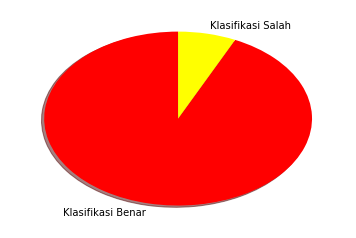

In [19]:
 colors = ['red', 'yellow']
sizes = [countacc, false]
labels = 'Klasifikasi Benar', 'Klasifikasi Salah'

## use matplotlib to plot the chart
plt.pie(
   x=sizes,
   shadow=True,
   colors=colors,
   labels=labels,
   startangle=90
)

plt.show()